In [1]:
import sys
import scipy
import numpy as np
import pandas
import sklearn
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
#from sklearn.datasets import load_iris

In [14]:
#dataset = pd.read_csv("new4_final_temp_feat.csv")
dataset = pd.read_csv("extracted_all_feat.csv")
#dataset.columns
#print(len(dataset.columns))
dataset.fillna(0.999, inplace=True)
x = dataset.iloc[:, 1:33].values
y = dataset.iloc[:, 33].values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [31]:
#dataset = pd.read_csv("new4_final_temp_feat.csv")
dataset = pd.read_csv("extracted_all_feat.csv")
#dataset.columns
#print(len(dataset.columns))
dataset.fillna(0.999, inplace=True)
x = dataset.iloc[:, np.r_[1,4,5,8,13,19,22,24,25,27]].values
#x = dataset.iloc[:, np.r_[1,2,4,7,10,12,13,14,28,31]].values
#x = dataset.iloc[:, np.r_[30,10,14,4,2,28,13,16,9,1]].values
y = dataset.iloc[:, 33].values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [24]:
#dataset = pd.read_csv("new4_final_temp_feat.csv")
dataset = pd.read_csv("new4_final_temp_feat.csv")
#print(len(dataset.columns))
dataset.fillna(0.999, inplace=True)
x = dataset.iloc[:, 1:8].values
y = dataset.iloc[:, 9].values

In [21]:
dataset = pd.read_csv("new4_final_rt_feat.csv")
#print(len(dataset.columns))
#dataset.fillna(0.999, inplace=True)
x = dataset.iloc[:, 1:12].values
y = dataset.iloc[:, 13].values

In [17]:
dataset = pd.read_csv("new4_final_graph_feat.csv")
#print(len(dataset.columns))
#dataset.fillna(0.999, inplace=True)
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 3].values

In [11]:
#add columns to dataframe
import pandas as pd
#a = pd.read_csv("final_rt_feat.csv")
#b = pd.read_csv("final_temp_feat.csv")
a = pd.read_csv("new4_final_rt_feat.csv")
b = pd.read_csv("new4_final_temp_feat.csv")

merged = pd.merge(b, a, how='left', on=['groupID','label'])
merged.fillna(0.999, inplace=True)
x = merged.iloc[:,  np.r_[ 1:8, 10:21]].values
y = merged.iloc[:, 9].values  

In [2]:
#add columns to dataframe
import pandas as pd
#a = pd.read_csv("final_graph_feat.csv")
#b = pd.read_csv("final_temp_feat.csv")

a = pd.read_csv("new4_final_graph_feat.csv")
b = pd.read_csv("new4_final_temp_feat.csv")

merged = pd.merge(b, a, how='left', on=['groupID','label'])
merged.fillna(0.999, inplace=True)

c = pd.read_csv("new4_final_rt_feat.csv")
new3_merged = pd.merge(merged, c, how='left', on=['groupID','label'])
x = new3_merged.iloc[:,  np.r_[ 1:8, 10:11, 12:23]].values
y = new3_merged.iloc[:, 9].values 
  

In [4]:
dataset.columns
x = dataset.iloc[:,  np.r_[ 30,10,14,4,2,28,13,16,1,9]].values

Index(['groupID', 'inter_posting_time_compactness',
       'retweeting_time_distribution_sd', 'retweeting_time_distribution_mean',
       'retweeting_time_distribution_cov', 'cov_response_time',
       'user_creation_time_distribution_sd',
       'user_creation_time_distribution_mean',
       'user_creation_time_distribution_cov', 'avg_neighbor_degree_entropy',
       'avg_neighbor_degree_sd', 'avg_neighbor_degree_mean',
       'avg_neighbor_degree_cov', 'avg_degree_connectivity_entropy',
       'avg_degree_connectivity_sd', 'avg_degree_connectivity_mean',
       'avg_degree_connectivity_cov', 'digitsInScreenName_entropy',
       'hashtagsInUserName_entropy', 'specialCharacters_uname_entropy',
       'url_in_bio_entropy', 'mention_in_bio_entropy',
       'hashtags_in_bio_entropy', 'length_screen_name_entropy',
       'length_user_name_entropy', 'statuses_count_entropy',
       'listed_count_entropy', 'favourites_count_entropy',
       'standard_dev_statuses_count', 'standard_dev_listed

In [ ]:
import pandas as pd
#a = pd.read_csv("final_graph_feat.csv")
#b = pd.read_csv("final_temp_feat.csv")

a = pd.read_csv("new4_final_graph_feat.csv")
b = pd.read_csv("new4_final_temp_feat.csv")

merged = pd.merge(b, a, how='left', on=['groupID','label'])
merged.fillna(0.999, inplace=True)
x = merged.iloc[:,  np.r_[ 1:8, 10:11]].values
y = merged.iloc[:, 9].values 

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [33]:
# Spot Check Algorithms
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))

#models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=200,class_weight="balanced")))
#models.append(('Random Forest',RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)))
#models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Logistic Regression', LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear',class_weight="balanced")))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

Decision Tree: 0.878893
Random Forest: 0.919177
Logistic Regression: 0.907175
Gradient Boosting: 0.905097
Linear Discriminant Analysis: 0.911216
KNN: 0.919175
SVM: 0.917260


In [4]:
results

[array([0.92      , 0.94      , 0.94      , 0.94      , 0.86      ,
        0.92      , 0.91836735, 0.89795918, 0.89795918, 0.89583333]),
 array([0.92      , 0.94      , 0.94      , 0.92      , 0.92      ,
        0.92      , 0.95918367, 0.95918367, 0.91836735, 0.91666667]),
 array([0.92      , 0.94      , 0.94      , 0.9       , 0.9       ,
        0.94      , 0.95918367, 0.91836735, 0.87755102, 0.91666667]),
 array([0.94      , 0.94      , 0.96      , 0.92      , 0.92      ,
        0.94      , 0.91836735, 0.97959184, 0.89795918, 0.91666667]),
 array([0.94      , 0.92      , 0.94      , 0.94      , 0.9       ,
        0.92      , 0.93877551, 0.95918367, 0.89795918, 0.91666667]),
 array([0.66      , 0.62      , 0.6       , 0.62      , 0.72      ,
        0.6       , 0.65306122, 0.67346939, 0.65306122, 0.72916667]),
 array([0.62      , 0.6       , 0.6       , 0.6       , 0.6       ,
        0.6       , 0.6122449 , 0.63265306, 0.6122449 , 0.60416667])]

In [34]:
# Spot Check Algorithms
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))

#models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=200,class_weight="balanced")))
#models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Logistic Regression', LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear',class_weight="balanced")))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

Decision Tree: 0.879973
Random Forest: 0.973085
Logistic Regression: 0.963985
Gradient Boosting: 0.964435
Linear Discriminant Analysis: 0.967473
KNN: 0.956068
SVM: 0.971727


In [35]:
# Spot Check Algorithms
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))

#models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=200, class_weight="balanced")))
#models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Logistic Regression', LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear',class_weight="balanced")))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='precision')
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

Decision Tree: 0.848481
Random Forest: 0.919515
Logistic Regression: 0.867332
Gradient Boosting: 0.897724
Linear Discriminant Analysis: 0.907560
KNN: 0.905181
SVM: 0.907346


In [36]:
# Spot Check Algorithms
models = []
models.append(('Decision Tree', DecisionTreeClassifier(class_weight="balanced")))

#models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=200,class_weight="balanced")))
#models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Logistic Regression', LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear',class_weight="balanced")))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

Decision Tree: 0.857368
Random Forest: 0.882368
Logistic Regression: 0.913421
Gradient Boosting: 0.867105
Linear Discriminant Analysis: 0.867895
KNN: 0.897632
SVM: 0.887368


In [37]:
# Spot Check Algorithms
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))

#models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=200,class_weight="balanced")))
#models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Logistic Regression', LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear',class_weight="balanced")))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

Decision Tree: 0.846709
Random Forest: 0.889943
Logistic Regression: 0.887647
Gradient Boosting: 0.885573
Linear Discriminant Analysis: 0.885634
KNN: 0.898988
SVM: 0.895047


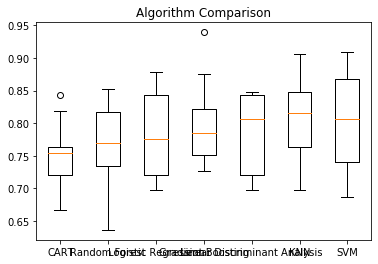

In [21]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [18]:
# Make predictions on validation dataset
model =RandomForestClassifier(n_estimators=200)
#model = LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')
#model = GradientBoostingClassifier()
#model= DecisionTreeClassifier()
#model= LinearDiscriminantAnalysis()
#model=LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')
#model = SVC(gamma='auto')
model.fit(X_train, Y_train)
#m=np.where(np.isnan(X_test))
predictions = model.predict(X_test)
# Evaluate predictions
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[64  2]
 [ 6 52]]
0.9354838709677419
              precision    recall  f1-score   support

       False       0.91      0.97      0.94        66
        True       0.96      0.90      0.93        58

    accuracy                           0.94       124
   macro avg       0.94      0.93      0.93       124
weighted avg       0.94      0.94      0.94       124



In [2]:
#add rows to DataFrame
import pandas as pd
dataset = pd.read_csv("final_graph_feat.csv")
dataset2 = pd.read_csv("extracted_graph_features_aletihad_alhilal.csv")
out = dataset.append(dataset2)
with open('new4_final_graph_feat.csv', 'w', encoding='utf-8') as f:
    out.to_csv(f, index=False)
    

In [3]:
#add columns to dataframe
import pandas as pd
#a = pd.read_csv("final_rt_feat.csv")
a = pd.read_csv("final_graph_feat.csv")
b = pd.read_csv("final_temp_feat.csv")

merged = pd.merge(b, a, how='left', on=['groupID','label'])
    

In [4]:
merged.head()

,groupID,inter_posting_time_compactness,retweeting_time_distribution_sd,retweeting_time_distribution_mean,retweeting_time_distribution_cov,cov_response_time,user_creation_time_distribution_sd,user_creation_time_distribution_mean,user_creation_time_distribution_cov,label,...,specialCharacters_sname_entropy,specialCharacters_uname_entropy,url_in_bio_entropy,mention_in_bio_entropy,hashtags_in_bio_entropy,length_screen_name_entropy,length_user_name_entropy,rt_user_statuses_count_entropy,rt_user_listed_count_entropy,rt_user_favourites_count_entropy
0,d802ea6227084ee2ac615150196a79b9,0.292237,3325.473129,1749.296805,1.901034,0.256111,1.151538e+07,8.342802e+06,1.380277,False,...,0.0,2.242653,0.0,0.000000,0.000000,3.095821,3.704872,4.954196,0.753828,4.954196
1,6493e40ac62c4ba0b4a537452bb05798,0.433829,1863.548653,1081.143679,1.723683,0.514696,2.992714e+06,3.227216e+06,0.927336,False,...,0.0,2.195640,0.0,0.000000,0.278891,3.178780,4.121319,6.368508,1.546323,6.368508
2,9030653907244d00b34a52db9cca49d1,0.267016,2216.625680,1680.118293,1.319327,0.455857,2.446745e+07,9.815660e+06,2.492695,False,...,0.0,1.531920,0.0,0.000000,0.000000,2.667629,3.407268,4.584963,0.497150,4.501629
3,3f0106db71e74879a4e53ebd3b9a2005,0.108434,1930.068525,2499.879378,0.772065,1.008509,3.647970e+07,1.493965e+07,2.441803,False,...,0.0,1.247556,0.0,0.696212,0.000000,3.000000,3.202820,4.000000,1.496641,4.000000
4,84481f82a41b4b79b70d526fd9266069,0.098039,3331.455671,3229.620046,1.031532,0.543634,1.406057e+07,1.652825e+07,0.850700,False,...,0.0,1.985228,0.0,0.000000,0.000000,2.807355,2.950212,3.807355,2.064043,3.807355


In [5]:
print(len(merged.columns))

22


In [50]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(x, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x)
# summarize selected features
#print(features[0:4,:])

[3.905e+02 7.921e+01 9.388e+00 2.746e+02 1.370e+02 5.098e+00 1.308e+01
 2.442e+02 2.757e+01 8.558e+00       nan 5.545e+01 8.771e-02 7.802e+00
 7.119e+01 1.680e+00 7.424e+00 1.700e+01 6.868e+01]


C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [10] are constant.
  UserWarning)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [52]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [18]:
# Create and fit selector
selector = SelectKBest(f_classif, k=7)
selector.fit(X, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = dataset.iloc[:,cols]

In [19]:

x = features_df_new.iloc[:, 1:6].values
 
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.20, random_state=1)

In [20]:
# Spot Check Algorithms
models = []
models.append(('Extra Trees',ExtraTreesClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

#models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)))
#models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Logistic Regression', LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

Decision Tree: 0.899632
Random Forest: 0.917831
Logistic Regression: 0.927022
Gradient Boosting: 0.915074
Linear Discriminant Analysis: 0.908456
KNN: 0.914706
SVM: 0.704044


In [85]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
dataset = pd.read_csv("final_rt_feat.csv")

X= dataset.iloc[:, 1:12].values
Y = dataset.iloc[:, 13].values
# feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:4,:])

[23.064  6.926    nan 46.34   0.201  3.417 61.017  0.308  3.94  11.421
 53.731]
[[2.771 2.243 0.    4.954 0.754]
 [2.952 2.196 0.279 6.369 1.546]
 [2.387 1.532 0.    4.585 0.497]
 [2.483 1.248 0.    4.    1.497]]


C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [2] are constant.
  UserWarning)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [14]:
print(len(dataset.columns))

10


In [75]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
dataset = pd.read_csv("final_temp_feat.csv")
#print(len(dataset.columns))
dataset.fillna(0.999, inplace=True)
X = dataset.iloc[:, 1:8].values
Y = dataset.iloc[:, 9].values
# feature extraction
#model = LogisticRegression(solver='lbfgs')
model =RandomForestClassifier(n_estimators=200)
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True  True False  True False False False]
Feature Ranking: [1 1 3 1 2 5 4]


In [81]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
# load data
dataset = pd.read_csv("final_temp_feat.csv")
#print(len(dataset.columns))
dataset.fillna(0.999, inplace=True)
X = dataset.iloc[:, 1:8].values
Y = dataset.iloc[:, 9].values
# feature extraction
#model = ExtraTreesClassifier(n_estimators=10)
model =RandomForestClassifier(n_estimators=100)
model.fit(X, Y)
print(model.feature_importances_)

[0.153 0.291 0.064 0.281 0.102 0.051 0.058]


In [4]:
#add rows to DataFrame
import pandas as pd
dataset = pd.read_csv("extracted_all_feat.csv")
dataset2 = pd.read_csv("extracted_Annual_bonus_feat.csv")
out = dataset.append(dataset2)
with open('8.csv', 'w', encoding='utf-8') as f:
    out.to_csv(f, index=False)
    

In [22]:
# Spot Check Algorithms
models = []
models.append(('Decision Tree', DecisionTreeClassifier(class_weight="balanced")))

#models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0,class_weight="balanced")))
#models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Logistic Regression', LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear',class_weight="balanced")))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

Decision Tree: 0.907662
Random Forest: 0.975210
Logistic Regression: 0.976015
Gradient Boosting: 0.970853
Linear Discriminant Analysis: 0.968534
KNN: 0.931575
SVM: 0.604925


In [4]:
# Spot Check Algorithms
models = []
models.append(('Decision Tree', DecisionTreeClassifier(class_weight="balanced")))

#models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0,class_weight="balanced")))
#models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Logistic Regression', LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear',class_weight="balanced")))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

Decision Tree: 0.901056
Random Forest: 0.937340
Logistic Regression: 0.917094
Gradient Boosting: 0.929299
Linear Discriminant Analysis: 0.927218
KNN: 0.890971
SVM: 0.626253


In [12]:
# Spot Check Algorithms
models = []
models.append(('Decision Tree', DecisionTreeClassifier(class_weight="balanced")))

#models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0,class_weight="balanced")))
#models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Logistic Regression', LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear',class_weight="balanced")))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

Decision Tree: 0.902632
Random Forest: 0.943421
Logistic Regression: 0.928158
Gradient Boosting: 0.918158
Linear Discriminant Analysis: 0.918158
KNN: 0.562105
SVM: 0.010263


In [18]:
# Spot Check Algorithms
models = []
models.append(('Decision Tree', DecisionTreeClassifier(class_weight="balanced")))

#models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0,class_weight="balanced")))
#models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Logistic Regression', LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear',class_weight="balanced")))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

Decision Tree: 0.888012
Random Forest: 0.922642
Logistic Regression: 0.900907
Gradient Boosting: 0.913631
Linear Discriminant Analysis: 0.909262
KNN: 0.556737


C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437:

SVM: 0.019524


C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
